In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
warnings.filterwarnings('ignore')

#from google.colab import drive

#drive.mount('/content/drive')

#path = 'drive/MyDrive/MUIA/TFM/'
path=''

In [215]:
#reads the csv
stocks_spain = pd.read_excel(f'{path}data/stocks_spain.xlsx')
stocks_spain.drop(columns=stocks_spain.columns[0], axis=1, inplace=True)
stocks_spain.head()

,Date,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
0,2018-01-02,8.710,60.220001,48.349998,11.22,32.255001,170.500000,8.348511,7.953,7.082,...,1.655001,1.66,5.226751,2.500,8.191,9.400,4.397,1.290,66.521370,54.700001
1,2018-01-03,8.665,60.500000,49.299999,11.23,32.470001,172.399994,8.539362,7.964,7.094,...,1.676181,1.92,5.227709,2.459,8.166,9.432,4.430,1.310,66.286316,55.000000
2,2018-01-04,8.770,61.820000,49.750000,11.43,33.490002,175.399994,8.612767,8.082,7.221,...,1.717063,1.96,5.403084,2.553,8.295,9.574,4.470,1.320,66.286316,55.599998
3,2018-01-05,8.865,63.500000,50.299999,11.57,33.939999,177.350006,8.563830,8.140,7.253,...,1.738736,2.04,5.438543,2.572,8.358,9.830,4.450,1.315,66.599724,56.500000
4,2018-01-08,8.750,62.959999,49.700001,11.54,33.650002,178.250000,8.632341,8.124,7.235,...,1.729870,2.27,5.454834,2.600,8.370,9.570,4.405,1.307,66.443016,56.150002


Seleccionar una fecha sobre la que hacer análisis (borraremos los datos posteriores a esa fecha)

In [219]:
#Crahs inicio covid: '2020-02-09'

time = 100

# convert date column to datetime format
stocks_spain['Date'] = pd.to_datetime(stocks_spain['Date'])

finish_date_str = '2020-02-09'
finish_date = datetime.strptime(finish_date_str, '%Y-%m-%d')
start_date = finish_date - timedelta(days=time)

# filter the dataframe to keep rows before and after the filter date 
stocks_filter = stocks_spain[(stocks_spain['Date'] <= finish_date) & (stocks_spain['Date'] >= start_date)]


# print the resulting dataframe
print(f'Start date: {start_date}')
print(f'Finish date: {finish_date}')
print(stocks_filter)

Start date: 2019-11-01 00:00:00
Finish date: 2020-02-09 00:00:00
          Date    A3M        AMS        ALB   APPS        ACS        AENA  \
468 2019-11-01  3.760  67.180000  45.000000  10.75  36.849998  167.399994   
469 2019-11-04  3.846  67.639999  45.450001  10.86  37.200001  167.649994   
470 2019-11-05  3.818  66.980003  45.849998  11.07  36.740002  167.399994   
471 2019-11-06  3.748  68.580002  45.549999  10.96  36.740002  166.399994   
472 2019-11-07  3.786  71.080002  45.750000  11.04  36.029999  167.800003   
..         ...    ...        ...        ...    ...        ...         ...   
532 2020-02-03  3.042  72.180000  45.349998  10.40  29.559999  168.500000   
533 2020-02-04  3.038  74.419998  45.650002  10.75  29.780001  169.000000   
534 2020-02-05  3.094  73.940002  46.049999  10.80  30.450001  171.100006   
535 2020-02-06  3.090  74.660004  45.900002  10.89  30.150000  170.000000   
536 2020-02-07  3.058  73.320000  45.599998  10.80  30.520000  169.149994   

          

In [220]:
# Calculate returns
logreturn = np.log(stocks_filter.iloc[:,1:]).diff()
logreturn = logreturn.iloc[1: , :]
logreturn

,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,ACX,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
469,0.022615,0.006824,0.009950,0.010181,0.009453,0.001492,0.002354,0.024801,0.030176,0.038033,...,0.024953,0.000704,0.032164,0.021962,0.002744,0.002560,0.014134,0.033061,0.001281,-0.007805
470,-0.007307,-0.009805,0.008762,0.019152,-0.012443,-0.001492,0.012270,0.009567,0.015460,0.019693,...,0.021851,-0.000704,0.014645,-0.012057,-0.009711,-0.003659,0.024265,0.012121,-0.002564,0.001648
471,-0.018504,0.023607,-0.006565,-0.009986,0.000000,-0.005992,-0.005240,-0.018287,-0.010144,0.015437,...,-0.011594,-0.008487,-0.004106,-0.009905,-0.017780,0.016722,0.008525,-0.009801,0.016550,0.006156
472,0.010088,0.035805,0.004381,0.007273,-0.019514,0.008378,0.006401,0.022577,0.017184,0.018596,...,0.017818,0.008487,0.020622,0.024954,0.017489,0.004675,-0.005106,0.030245,0.011300,0.013816
473,0.000528,0.005332,0.005450,0.001810,-0.011164,-0.001789,0.005207,-0.020702,-0.006233,0.025095,...,-0.007185,-0.036576,-0.022083,-0.001495,-0.001166,0.010707,-0.017212,0.022785,0.001248,-0.010956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,-0.005246,0.019022,-0.009874,-0.008617,-0.015775,0.008044,0.015608,0.003411,-0.000750,0.006794,...,0.008319,-0.006530,0.002389,-0.019494,0.000164,0.001816,-0.006723,0.007735,-0.010363,0.026679
533,-0.001316,0.030562,0.006593,0.033100,0.007415,0.002963,0.017544,0.011510,0.025503,0.022097,...,0.017631,0.004753,0.035435,0.009404,0.010906,0.003823,0.008396,-0.008845,-0.002086,0.017465
534,0.018265,-0.006471,0.008724,0.004640,0.022249,0.012350,0.007220,0.024602,0.029140,0.036415,...,-0.004078,0.019372,0.027523,0.007770,-0.002918,0.018506,-0.020271,-0.002780,0.000000,-0.008996
535,-0.001294,0.009691,-0.003263,0.008299,-0.009901,-0.006450,-0.013763,0.006220,0.034510,0.025637,...,0.016214,-0.002328,0.009444,-0.000774,0.010177,0.003543,0.005106,0.009421,0.018615,-0.012528


In [221]:
#craetes a correlation matrix
cor_matrix = logreturn.corr()
#shows the first 5 rows
cor_matrix.head()

,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,ACX,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
A3M,1.000000,0.089618,0.063662,0.392265,0.373263,0.230571,0.254388,0.347963,0.231110,0.269166,...,0.157878,-0.009240,0.317791,0.377083,0.290656,0.425562,0.314724,0.266997,0.010134,0.064636
AMS,0.089618,1.000000,0.172610,0.440189,0.221087,0.352786,0.172618,0.037272,0.118972,0.431995,...,0.134889,-0.023827,0.226540,0.337329,0.254528,0.166167,0.167867,0.092138,0.135664,0.320987
ALB,0.063662,0.172610,1.000000,0.216383,0.177058,0.187457,0.179978,0.228595,0.275449,0.226319,...,0.311825,0.076328,0.329694,0.241445,0.154742,0.022355,0.016214,0.246538,0.077797,0.148191
APPS,0.392265,0.440189,0.216383,1.000000,0.405761,0.111955,0.246934,0.398152,0.395590,0.441920,...,0.430258,0.065316,0.537373,0.388675,0.321384,0.362293,0.346787,0.247971,-0.016339,0.357821
ACS,0.373263,0.221087,0.177058,0.405761,1.000000,0.342111,0.214450,0.347951,0.366138,0.386581,...,0.364102,-0.030350,0.392521,0.357352,0.305927,0.512354,0.351566,0.139853,0.075850,0.171172


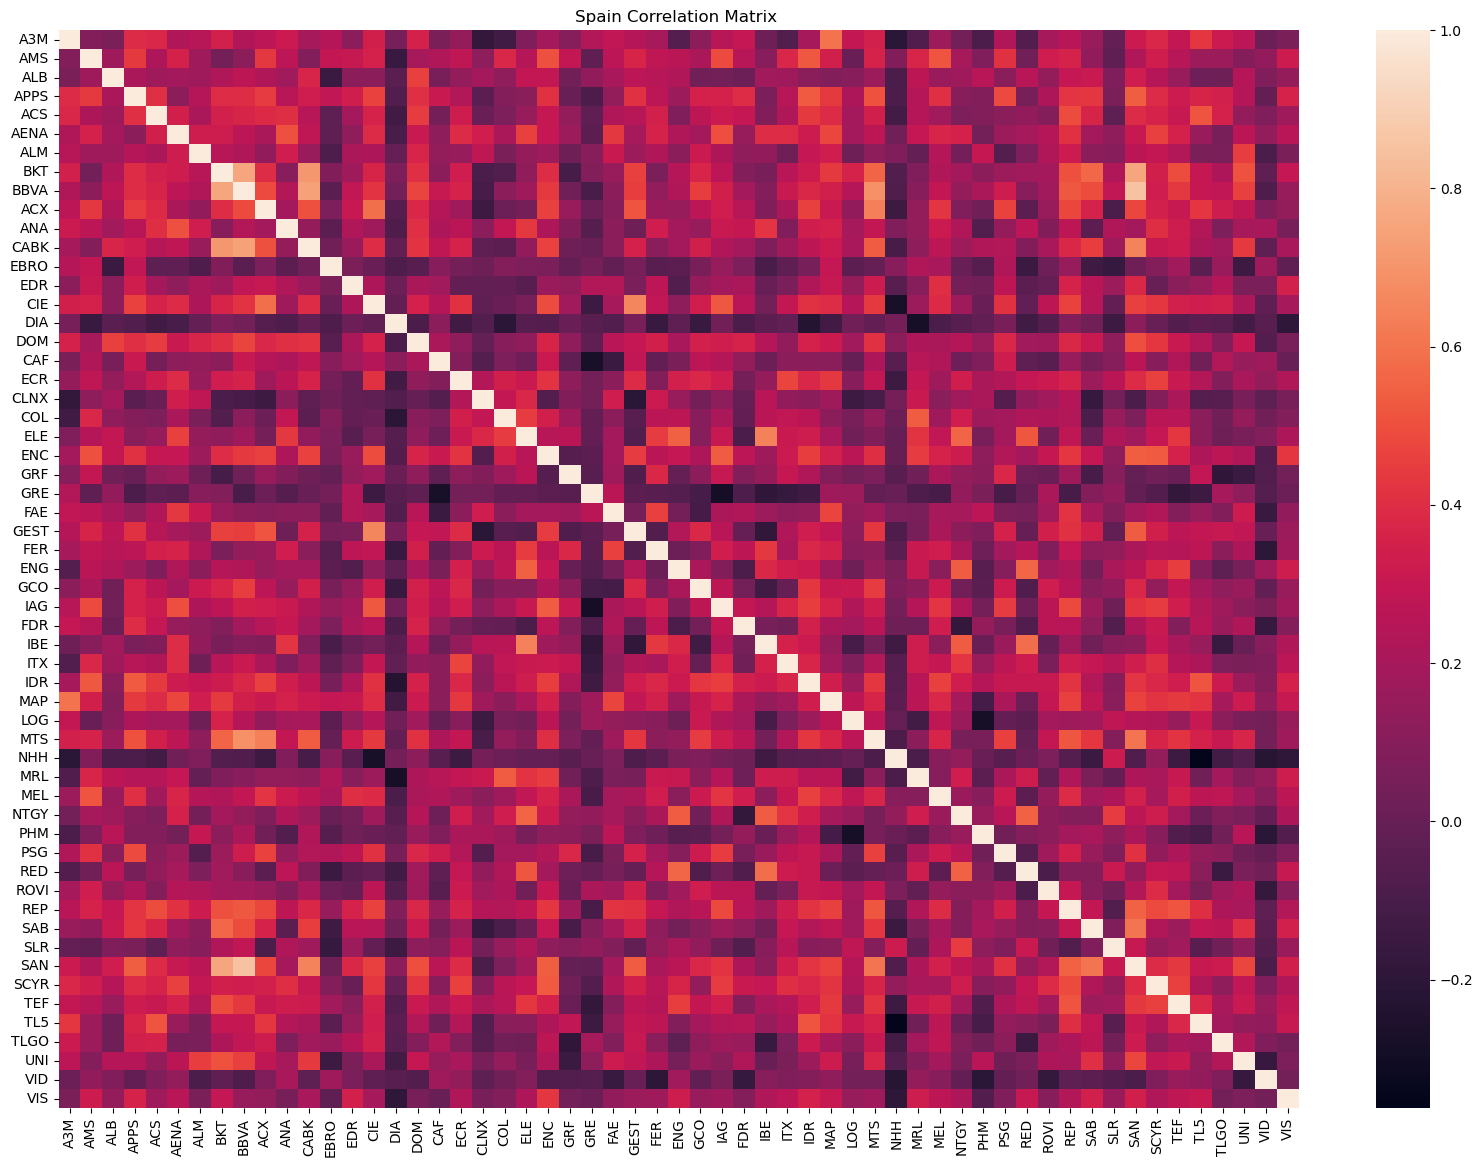

In [222]:
plt.figure(figsize=(20, 14))
sns.heatmap(cor_matrix, annot=False)
plt.title("Spain Correlation Matrix ")
plt.show()

In [224]:
#extracts the indices from the correlation matrix, which are the stocks
corInd_matrix = stocks_spain.iloc[:,1:].corr()
stocks = corInd_matrix.index.values
stocks

array(['A3M', 'AMS', 'ALB', 'APPS', 'ACS', 'AENA', 'ALM', 'BKT', 'BBVA',
       'ACX', 'ANA', 'CABK', 'EBRO', 'EDR', 'CIE', 'DIA', 'DOM', 'CAF',
       'ECR', 'CLNX', 'COL', 'ELE', 'ENC', 'GRF', 'GRE', 'FAE', 'GEST',
       'FER', 'ENG', 'GCO', 'IAG', 'FDR', 'IBE', 'ITX', 'IDR', 'MAP',
       'LOG', 'MTS', 'NHH', 'MRL', 'MEL', 'NTGY', 'PHM', 'PSG', 'RED',
       'ROVI', 'REP', 'SAB', 'SLR', 'SAN', 'SCYR', 'TEF', 'TL5', 'TLGO',
       'UNI', 'VID', 'VIS'], dtype=object)

In [225]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)
print(cor_matrix)

[[ 1.          0.08961793  0.06366206 ...  0.26699667  0.01013433
   0.06463573]
 [ 0.08961793  1.          0.17261025 ...  0.09213837  0.13566391
   0.32098711]
 [ 0.06366206  0.17261025  1.         ...  0.24653816  0.07779712
   0.14819108]
 ...
 [ 0.26699667  0.09213837  0.24653816 ...  1.         -0.16125289
   0.07246721]
 [ 0.01013433  0.13566391  0.07779712 ... -0.16125289  1.
   0.03905916]
 [ 0.06463573  0.32098711  0.14819108 ...  0.07246721  0.03905916
   1.        ]]


In [226]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_array(cor_matrix)

#relabels the nodes to match the stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

In [227]:
G.nodes

NodeView(('A3M', 'AMS', 'ALB', 'APPS', 'ACS', 'AENA', 'ALM', 'BKT', 'BBVA', 'ACX', 'ANA', 'CABK', 'EBRO', 'EDR', 'CIE', 'DIA', 'DOM', 'CAF', 'ECR', 'CLNX', 'COL', 'ELE', 'ENC', 'GRF', 'GRE', 'FAE', 'GEST', 'FER', 'ENG', 'GCO', 'IAG', 'FDR', 'IBE', 'ITX', 'IDR', 'MAP', 'LOG', 'MTS', 'NHH', 'MRL', 'MEL', 'NTGY', 'PHM', 'PSG', 'RED', 'ROVI', 'REP', 'SAB', 'SLR', 'SAN', 'SCYR', 'TEF', 'TL5', 'TLGO', 'UNI', 'VID', 'VIS'))

In [228]:
'''
plt.subplots(figsize=(13,13))

nx.draw_shell(G,with_labels =True, node_color = 'pink',node_size =500, edge_color = 'purple')

plt.title("Spain Correlation Networks")

plt.show()
'''

'\nplt.subplots(figsize=(13,13))\n\nnx.draw_shell(G,with_labels =True, node_color = \'pink\',node_size =500, edge_color = \'purple\')\n\nplt.title("Spain Correlation Networks")\n\nplt.show()\n'

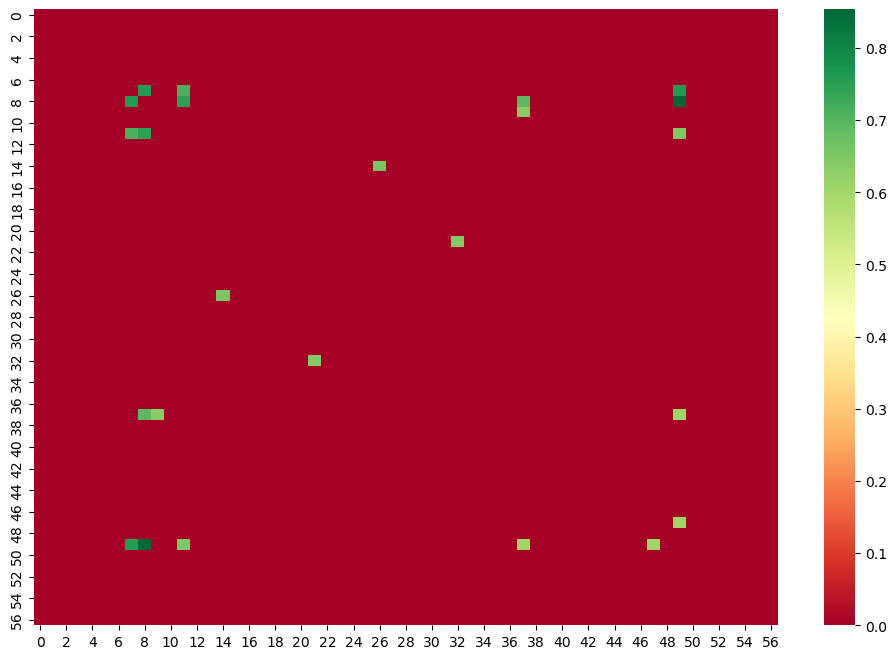

In [229]:
umbral = 0.6

#build new matrix
matrix_new = np.array(cor_matrix)  
#use np.where as filter with the below conditions
positive_corr = np.where(((matrix_new > umbral) & (matrix_new < 1.0)), matrix_new, 0)
negative_corr = np.where(matrix_new < 0, matrix_new, 0)

plt.figure(figsize=(12, 8))
sns.heatmap(positive_corr, annot=False, cmap='RdYlGn')
plt.show()

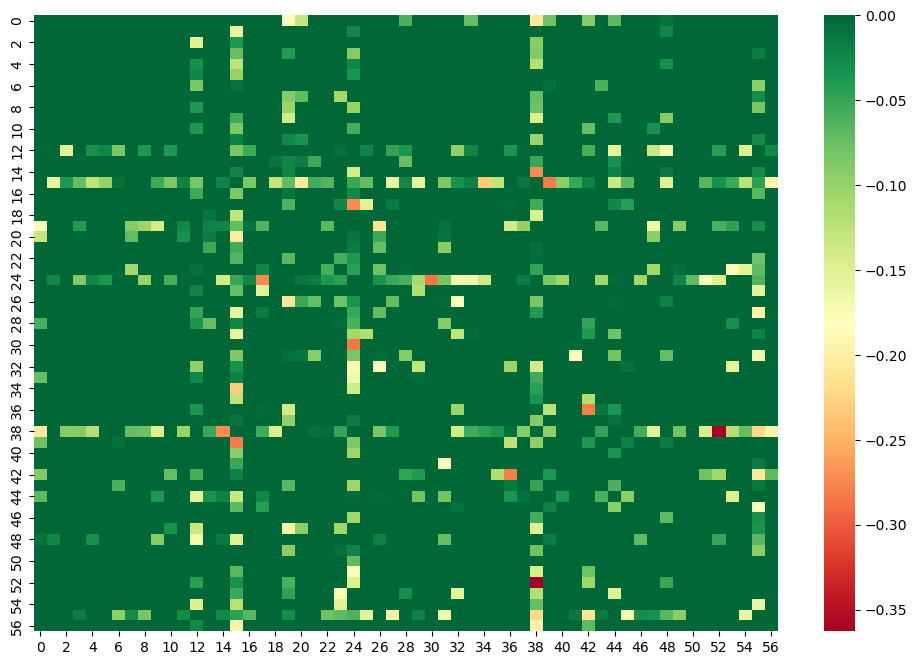

In [230]:
plt.figure(figsize=(12, 8))
sns.heatmap(negative_corr, annot=False, cmap='RdYlGn')
plt.show()

In [231]:
import math

# vfunc permite obtener la distancia a partir de las correlaciones 

distance = lambda c:  math.sqrt(2*(1-c))
vfunc = np.vectorize(distance)
distances = vfunc(positive_corr)
print(distances)

# Filtramos para representar solo aquellas distancias inferiores a min_distance
max_distance = math.sqrt(2*(1-umbral))
print(f'max_distance = {max_distance}')
positive_dist = np.where((distances < max_distance), distances, 0)
print(positive_dist)

[[1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 ...
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.41421356 1.41421356]]
max_distance = 0.8944271909999159
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [232]:
from networkx.classes.function import edges
#Crates graph using the data of the correlation matrix
G_positive = nx.from_numpy_array(positive_dist)

#relabels the nodes to match the  stocks names
G_positive = nx.relabel_nodes(G_positive,lambda x: stocks[x])

In [233]:
G_positive.adj

AdjacencyView({'A3M': {}, 'AMS': {}, 'ALB': {}, 'APPS': {}, 'ACS': {}, 'AENA': {}, 'ALM': {}, 'BKT': {'BBVA': {'weight': 0.6956640852134426}, 'CABK': {'weight': 0.7609442655923442}, 'SAN': {'weight': 0.6957511047462477}}, 'BBVA': {'BKT': {'weight': 0.6956640852134426}, 'CABK': {'weight': 0.7159782349661011}, 'MTS': {'weight': 0.7867460480023993}, 'SAN': {'weight': 0.5409563430778819}}, 'ACX': {'MTS': {'weight': 0.8536989473565662}}, 'ANA': {}, 'CABK': {'BKT': {'weight': 0.7609442655923442}, 'BBVA': {'weight': 0.7159782349661011}, 'SAN': {'weight': 0.8402068863003498}}, 'EBRO': {}, 'EDR': {}, 'CIE': {'GEST': {'weight': 0.8305814639718925}}, 'DIA': {}, 'DOM': {}, 'CAF': {}, 'ECR': {}, 'CLNX': {}, 'COL': {}, 'ELE': {'IBE': {'weight': 0.8480870151422483}}, 'ENC': {}, 'GRF': {}, 'GRE': {}, 'FAE': {}, 'GEST': {'CIE': {'weight': 0.8305814639718925}}, 'FER': {}, 'ENG': {}, 'GCO': {}, 'IAG': {}, 'FDR': {}, 'IBE': {'ELE': {'weight': 0.8480870151422483}}, 'ITX': {}, 'IDR': {}, 'MAP': {}, 'LOG': {

In [234]:
# get a list of nodes with no edges
isolates = list(nx.isolates(G_positive))

# remove the isolated nodes from the graph
G_positive.remove_nodes_from(isolates)

In [235]:
# Compute the sum of weights for each node
node_weights = {}
for node in G_positive.nodes():
    node_weights[node] = sum([edge[2]['weight'] for edge in G_positive.edges(node, data=True)])

# Normalize the sum of weights for each node
total_weight = sum(node_weights.values())
for node in node_weights:
    node_weights[node] /= total_weight

# Set the size of each node proportional to its normalized sum of weights
node_sizes = [node_weights[node]*30000 for node in G_positive.nodes()]

# Adjust the layout
pos = nx.kamada_kawai_layout(G_positive)





In [236]:
from pandas.core.arrays.categorical import CategoricalAccessor
# Define the categories of each node
tickers = pd.read_excel(f'{path}data/tickers.xlsx')

# Discard columns that are not necessary
tickers = tickers.loc[:,'Simbolo':'Sector']
tickers['Simbolo'] = tickers['Simbolo'].str.slice(stop=-3)
#print(tickers)

# Create a dictionary where each row represents a key-value pair
ticker_category = dict(zip(tickers['Simbolo'], tickers['Sector']))
print(f'Ticker category: {ticker_category}')

# Get a list of all possible values of the values of the dictionary
node_categories = list(set(ticker_category.values()))
print(f'Node categories: {node_categories}')

# Define a color map for each category
category_colors = {'Petrol and Power': 'red', 'Technology and Telecommunications': 'blue', 'Financial Services':'brown', 'Consumer Goods':'green', 'Consumer Services':'yellow', 'Real Estate Services':'grey', 'Basic Mat., Industry and Construction':'orange'}

# Create a list of colors for each node
node_colors = [category_colors[ticker_category[n]] for n in G_positive.nodes()]


Ticker category: {'A3M': 'Consumer Services', 'ACS': 'Basic Mat., Industry and Construction', 'ACX': 'Basic Mat., Industry and Construction', 'AENA': 'Consumer Services', 'ALB': 'Financial Services', 'ALM': 'Consumer Goods', 'AMS': 'Technology and Telecommunications', 'ANA': 'Basic Mat., Industry and Construction', 'APPS': 'Basic Mat., Industry and Construction', 'BBVA': 'Financial Services', 'BKT': 'Financial Services', 'CABK': 'Financial Services', 'CAF': 'Basic Mat., Industry and Construction', 'CIE': 'Basic Mat., Industry and Construction', 'CLNX': 'Technology and Telecommunications', 'COL': 'Real Estate Services', 'DIA': 'Consumer Services', 'DOM': 'Technology and Telecommunications', 'EBRO': 'Consumer Goods', 'ECR': 'Basic Mat., Industry and Construction', 'EDR': 'Consumer Services', 'ELE': 'Petrol and Power', 'ENC': 'Consumer Goods', 'ENG': 'Petrol and Power', 'FAE': 'Consumer Goods', 'FDR': 'Basic Mat., Industry and Construction', 'FER': 'Basic Mat., Industry and Construction',

In [237]:
#Revisar por que las que no pinto aristas no tienen color #################

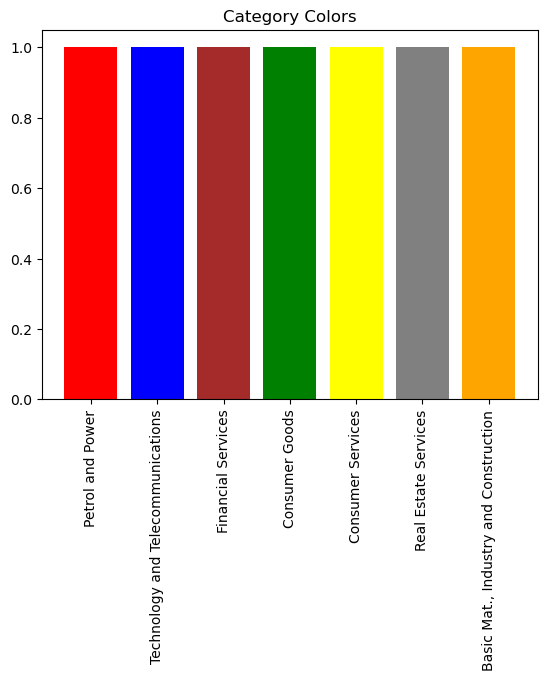

In [238]:
# Create a list of the categories and colors
categories = list(category_colors.keys())
colors = list(category_colors.values())

# Create a bar plot with a rectangle for each color
fig, ax = plt.subplots()
for i in range(len(colors)):
    ax.bar(i, 1, color=colors[i])

# Set the tick labels and title
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=90)
ax.set_title('Category Colors')

# Show the plot
plt.show()

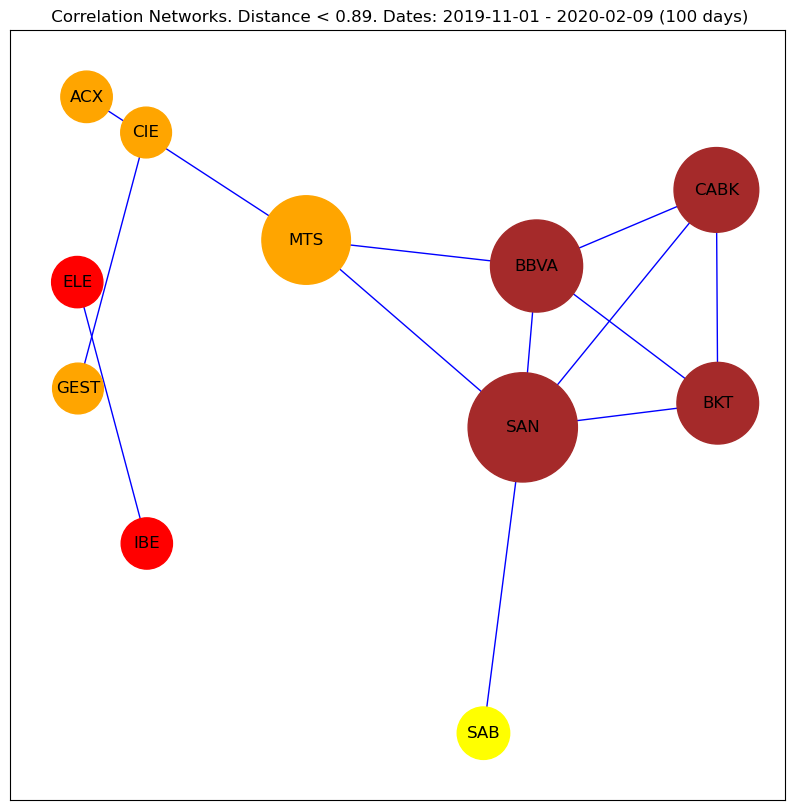

In [239]:
plt.subplots(figsize=(10,10))
nx.draw_networkx_nodes(G_positive, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G_positive, pos, edge_color = 'blue')
nx.draw_networkx_labels(G_positive, pos)
plt.title(f" Correlation Networks. Distance < {round(max_distance,2)}. Dates: {str(start_date)[:-9]} - {str(finish_date)[:-9]} ({time} days)")
plt.show()

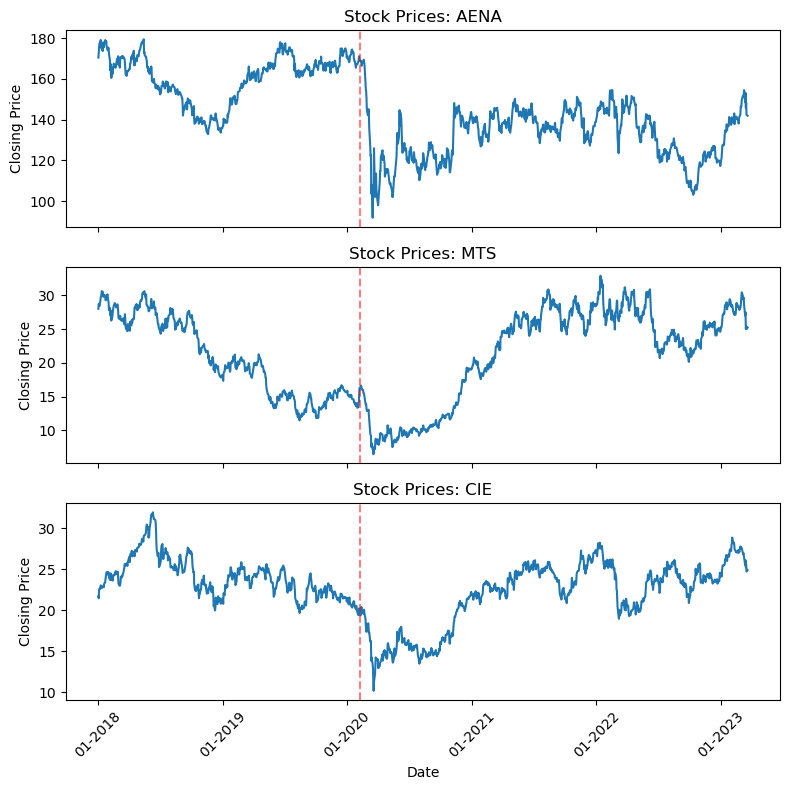

In [256]:
import datetime as dt
import matplotlib.pyplot as plt

# set the date to plot the vertical bar
red_line_date = finish_date

# Plotting the 3 companies with more correlation
#companies = ['SAN', 'BBVA', 'CABK']
companies = ['AENA', 'MTS', 'CIE']
dates = stocks_spain['Date']

# create a figure with subplots for each company
fig, axs = plt.subplots(nrows=len(companies), ncols=1, figsize=(8, 8), sharex=True)

# iterate over the companies and create a subplot for each one
for i, company in enumerate(companies):
    # select the prices for the current company
    prices = stocks_spain[company]
    
    # plot the prices on the current subplot
    axs[i].plot(dates, prices)
    
    # set the x-axis tick labels and rotation
    axs[i].xaxis.set_major_locator(date_locator)
    axs[i].xaxis.set_major_formatter(date_formatter)
    axs[i].xaxis.set_tick_params(rotation=45)

    # plot the vertical red line at the specified date
    axs[i].axvline(x=red_line_date, color='r', linestyle='--', alpha=0.5)
    
    # set the subplot title and axis labels
    axs[i].set_title(f'Stock Prices: {company}')
    axs[i].set_ylabel('Closing Price')

# set the x-axis label on the bottom subplot
axs[-1].set_xlabel('Date')

# adjust the subplots to prevent overlapping labels
fig.tight_layout()

# show the plot
plt.show()


In [241]:
'''
plt.subplots(figsize=(13,13))

nx.draw_shell(G_positive, pos, with_labels =True, node_color = 'pink',node_size = node_sizes, edge_color = 'purple') #Default node_size = 500

plt.title(f" Correlation Networks - distance < {max_distance}")

plt.show()
'''

'\nplt.subplots(figsize=(13,13))\n\nnx.draw_shell(G_positive, pos, with_labels =True, node_color = \'pink\',node_size = node_sizes, edge_color = \'purple\') #Default node_size = 500\n\nplt.title(f" Correlation Networks - distance < {max_distance}")\n\nplt.show()\n'

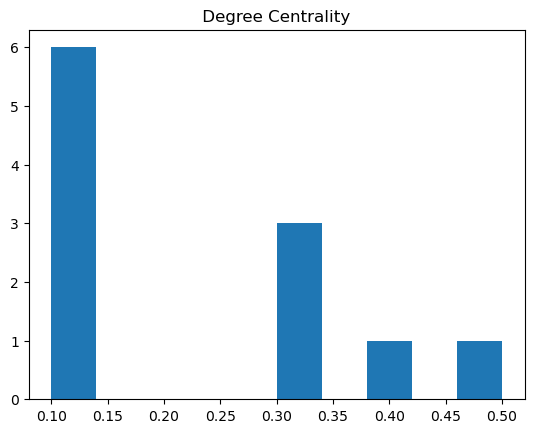

In [242]:
degree_centrality = nx.degree_centrality(G_positive)
plt.figure()
plt.hist(list(degree_centrality.values()))
plt.title(" Degree Centrality ")
plt.show()

In [243]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()



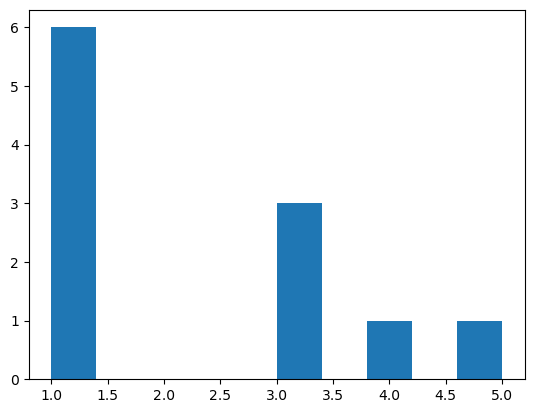

In [244]:
    plot_degree_dist(G_positive)

In [245]:
#Density of Graph

nx.density(G_positive)

0.21818181818181817

In [246]:
#Transitivity of Graph

nx.transitivity(G_positive)

0.6